create an animation of the stream under consideration being perturbed at any given point in time

In [1]:
import gcs
from gcs import path_handler as ph
import numpy as np 
from astropy import units as u
import matplotlib.pyplot as plt
import stream_analysis as sa 
import os 
import h5py
import matplotlib as mpl

In [2]:
import tauGammaProfileFrames as TGPF #type: ignore

In [3]:
# data params
GCname = "Pal5"
MWpotential = "pouliasis2017pii-GCNBody"
montecarlokey = "monte-carlo-000"
NP = int(1e5)
internal_dynamics = "isotropic-plummer"

In [1]:
def extract_snapshot(i,fname):
    with h5py.File(fname, 'r') as f:
        xp,yp,zp,vxp,vyp,vzp=f['StreamSnapShots'][str(i)][:]
    return xp,yp,zp,vxp,vyp,vzp

In [4]:
outdir=ph.paths['temporary'] + "stream_analysis/tauGammaProfileFrames/" + MWpotential  + GCname + "/" + montecarlokey  + "/"
os.makedirs(outdir,exist_ok=True)

In [5]:
orbfname=ph.GC_orbits(MWpotential,GCname)
tH,xH,yH,zH,vxH,vyH,vzH=gcs.extractors.GCOrbits.extract_whole_orbit(orbfname,montecarlokey)

In [6]:
fname=ph.StreamSnapShots(GCname=GCname,NP=NP,potential_env=MWpotential,internal_dynamics=internal_dynamics,montecarlokey=montecarlokey)
myfile=h5py.File(fname,"r")

In [7]:
timestamps=myfile['time_stamps'][:]
StreamSnapShots=myfile['StreamSnapShots']
# load orbit and stream data
fullhostorbit=gcs.extractors.GCOrbits.extract_whole_orbit(orbfname,montecarlokey)  
nFrames = len(timestamps)
i=150

In [8]:
# load orbit and stream data
tH,xH,yH,zH,vxH,vyH,vzH = fullhostorbit
xp,yp,zp,vxp,vyp,vzp=StreamSnapShots[str(i)][:]

In [9]:
NP = len(xp)
currenttime=timestamps[i]

In [10]:
# do coordinate transformation
TORB, XORB, YORB, ZORB, VXORB, VYORB, VZORB=sa.tailCoordinates.filter_orbit_by_dynamical_time(tH,xH,yH,zH,vxH,vyH,vzH,currenttime,2)
xT,yT,zT,vxT,vyT,vzT,indexes    =   sa.tailCoordinates.transform_from_galactico_centric_to_tail_coordinates(xp,yp,zp,vxp,vyp,vzp,TORB,XORB,YORB,ZORB,VXORB,VYORB,VZORB,t0=currenttime)
tau,gamma                       =   sa.tailCoordinates.tau_gamma(indexes,yT,TORB,XORB,YORB,ZORB,VXORB,VYORB,VZORB,currenttime)


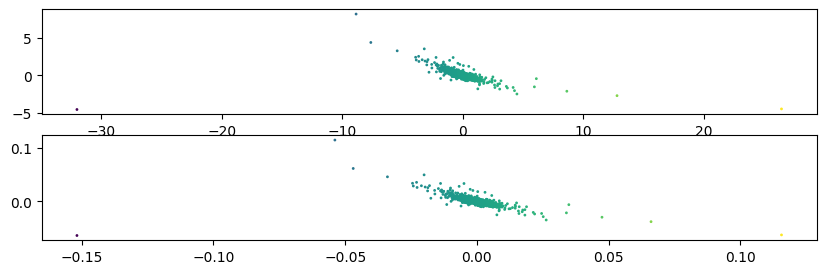

In [11]:
fig,axis=plt.subplots(2,1,figsize=(10,3))
axis[0].scatter(xT,yT,c=tau,s=1,cmap='viridis')
axis[1].scatter(tau,gamma,c=tau,s=1,cmap='viridis')

In [68]:
r=np.sqrt(xH**2+yH**2+zH**2)
v=np.sqrt(vxH**2+vyH**2+vzH**2)
2*np.median(r)/np.median(v)

0.1365595372477719

In [74]:
currenttime - 2*np.median(r)/np.median(v)

-5.096713537719393

In [72]:
tH[0]

-5.11356068

In [60]:
xlims,ylims=[-0.1,0.1],[-0.04,0.04]
FIG={"figsize":(10,10)}
AXIS,PROF,SCAT=TGPF.properties(NP,xlims,ylims)

In [61]:
(tau_centers,counts),(X,Y,H)=TGPF.grab_map_and_profile(NP,tau,gamma,xlims,ylims)

[None, Text(0.5, 0, '$\\tau$ [s kpc / km]'), Text(0, 0.5, 'counts')]

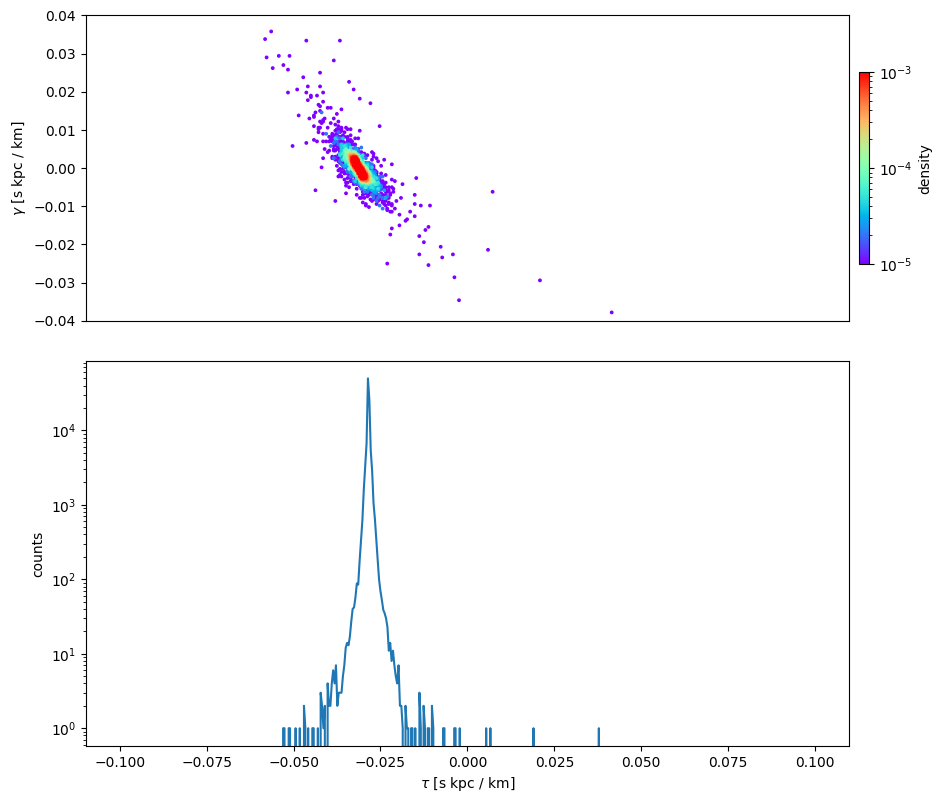

In [62]:
fig,axis0,axis1,cbar_ax=TGPF.gspec_tau_gamma_and_profile(FIG=FIG)

im=axis0.scatter(X,Y,c=H,**SCAT)
fig.colorbar(im,cax=cbar_ax,label="density")
axis1.plot(tau_centers,counts)

axis0.set(**AXIS)
axis1.set(**PROF)
